# Importing required libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Creating Pandas Dataframe using Final .csv file

In [2]:
import pandas as pd
output_filepath = 'D:/602_IntroToML/NFLDraftPrediction/Data/nfl_final.csv'


df = pd.read_csv(output_filepath)

print(df)

                Player   Pos  \
0         John Abraham   OLB   
1      Shaun Alexander    RB   
2       Darnell Alford    OT   
3       Darnell Alford    TE   
4     Rashard Anderson    CB   
...                ...   ...   
8141       Luke Wypler     C   
8142       Bryce Young    QB   
8143       Byron Young    DT   
8144       Byron Young  EDGE   
8145     Cameron Young    DT   

                                             stats_link    Ht     Wt  40yd  \
0                                                         6-4  252.0  4.55   
1     https://www.sports-reference.com/cfb/players/s...   6-0  218.0  4.58   
2                                                         6-4  334.0  5.56   
3                                                         6-2  253.0  4.97   
4                                                         6-2  206.0  4.55   
...                                                 ...   ...    ...   ...   
8141  https://www.sports-reference.com/cfb/players/l...   6-3  303.0 

# Different columns in Dataframe

In [3]:
print(df.columns)

Index(['Player', 'Pos', 'stats_link', 'Ht', 'Wt', '40yd', 'Vertical', 'Bench',
       'Broad Jump', '3Cone', 'Shuttle', 'Drafted (tm/rnd/yr)', 'year'],
      dtype='object')


In [4]:
df.head(5)

,Player,Pos,stats_link,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr),year
0,John Abraham,OLB,,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,New York Jets / 1st / 13th pick / 2000,2000
1,Shaun Alexander,RB,https://www.sports-reference.com/cfb/players/s...,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks / 1st / 19th pick / 2000,2000
2,Darnell Alford,OT,,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000
3,Darnell Alford,TE,,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,NaN,2000
4,Rashard Anderson,CB,,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000


In [5]:
#checking data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8146 entries, 0 to 8145
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               8146 non-null   object 
 1   Pos                  8146 non-null   object 
 2   stats_link           8146 non-null   object 
 3   Ht                   8117 non-null   object 
 4   Wt                   8122 non-null   float64
 5   40yd                 7557 non-null   float64
 6   Vertical             6286 non-null   float64
 7   Bench                5294 non-null   float64
 8   Broad Jump           6213 non-null   float64
 9   3Cone                4977 non-null   float64
 10  Shuttle              5098 non-null   float64
 11  Drafted (tm/rnd/yr)  5229 non-null   object 
 12  year                 8146 non-null   int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 827.5+ KB


#### height is object data type and is in 6-11 5-9 format which we have to convert into floats so thatt we can perfom operations for analysis

In [6]:
df['Player'] = df['Player'].astype(str)
df['Pos'] = df['Pos'].astype(str)
df['stats_link'] = df['stats_link'].astype(str)
df['Ht']=df['Ht'].astype(str)


print(df.dtypes)


Player                  object
Pos                     object
stats_link              object
Ht                      object
Wt                     float64
40yd                   float64
Vertical               float64
Bench                  float64
Broad Jump             float64
3Cone                  float64
Shuttle                float64
Drafted (tm/rnd/yr)     object
year                     int64
dtype: object


In [7]:
df['Ht'].unique()

array(['6-4', '6-0', '6-2', '5-10', '6-3', '5-9', '6-6', '6-1', '5-11',
       '6-5', '5-8', '6-7', '5-7', '6-8', '5-6', '6-9', '6-10', '5-5',
       'nan', '5-4'], dtype=object)

In [8]:
def convert_height(height):
    if pd.isnull(height):
        return np.nan 
    if isinstance(height, str) and '-' in height:
        feet, inches = map(int, height.split('-'))
        total_inches = feet * 12 + inches
        return total_inches
    else:
        return float(height) if not pd.isnull(height) else height

df['Ht'] = df['Ht'].apply(convert_height)
df['Ht'] = df['Ht'] * 2.54

print(df)

                Player   Pos  \
0         John Abraham   OLB   
1      Shaun Alexander    RB   
2       Darnell Alford    OT   
3       Darnell Alford    TE   
4     Rashard Anderson    CB   
...                ...   ...   
8141       Luke Wypler     C   
8142       Bryce Young    QB   
8143       Byron Young    DT   
8144       Byron Young  EDGE   
8145     Cameron Young    DT   

                                             stats_link      Ht     Wt  40yd  \
0                                                        193.04  252.0  4.55   
1     https://www.sports-reference.com/cfb/players/s...  182.88  218.0  4.58   
2                                                        193.04  334.0  5.56   
3                                                        187.96  253.0  4.97   
4                                                        187.96  206.0  4.55   
...                                                 ...     ...    ...   ...   
8141  https://www.sports-reference.com/cfb/players/l...

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ht,8117.0,187.456506,6.732384,162.56,182.88,187.96,193.04,208.28
Wt,8122.0,242.634819,45.325947,144.00,205.00,232.00,280.00,384.00
40yd,7557.0,4.774387,0.305362,4.22,4.53,4.69,4.97,6.05
Vertical,6286.0,32.923688,4.212262,17.50,30.00,33.00,36.00,46.50
Bench,5294.0,20.734794,6.381114,2.00,16.00,21.00,25.00,49.00
Broad Jump,6213.0,114.760663,9.373545,74.00,109.00,116.00,121.00,147.00
3Cone,4977.0,7.285622,0.417393,6.28,6.97,7.19,7.54,9.12
Shuttle,5098.0,4.401038,0.266749,3.73,4.20,4.36,4.56,5.56
year,8146.0,2011.698011,6.951318,2000.00,2006.00,2012.00,2018.00,2023.00


In [10]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Player,8146,6500,Bryce Hargrove,8
Pos,8146,22,WR,1130
stats_link,8146,6522,,1504
Drafted (tm/rnd/yr),5229,5116,Tampa Bay Buccaneers / 1st / 17th pick / 2009,2


### Categorizing player positions into generalized postions such as 
- QB (Quarterback)
    : **QB**
- RB (Running Back)
    :  **RB (Running Back), FB (Fullback)**
- WR (Wide Receiver)
    :  **WR**
- TE (Tight End)
    :  **TE**
- OL (Offensive Line)
    :  **OT (Offensive Tackle), OG (Offensive Guard), C (Center), OL (General Offensive Lineman), G (Guard)**
- DL (Defensive Line)
    :  **DE (Defensive End), DT (Defensive Tackle), DL (General Defensive Lineman), EDGE (Edge Rusher, a term used to describe players primarily tasked with pass-rushing, usually plays at the defensive end or outside linebacker positions)**
- LB (Linebacker)
    :  **OLB (Outside Linebacker), ILB (Inside Linebacker), LB (General Linebacker)**
- DB (Defensive Back)
    :  **CB (Cornerback), S (Safety), DB (General Defensive Back), SAF (Safety, often listed separately to emphasize a specific role or position focus within the safety category)**
- LS (Long Snapper)
    :  **LS**

In [11]:
df['Pos'] = df['Pos'].apply(lambda x: 'RB' if x == 'FB' else 'OL' if x == 'OT' or x == 'OG' or x == 'C' or  x == 'OL' or x == 'G' else 'DL' if x == 'DE' or x == 'DT' or x == 'DL' or x == 'EDGE' else 'LB' if x == 'OLB' or x == 'ILB' or x == 'LB' else 'DB' if x == 'CB' or x == 'S' or x == 'DB' or x == 'SAF' else x)

In [12]:
df

,Player,Pos,stats_link,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr),year
0,John Abraham,LB,,193.04,252.0,4.55,NaN,NaN,NaN,NaN,NaN,New York Jets / 1st / 13th pick / 2000,2000
1,Shaun Alexander,RB,https://www.sports-reference.com/cfb/players/s...,182.88,218.0,4.58,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks / 1st / 19th pick / 2000,2000
2,Darnell Alford,OL,,193.04,334.0,5.56,25.0,23.0,94.0,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000
3,Darnell Alford,TE,,187.96,253.0,4.97,29.0,NaN,104.0,7.29,4.49,NaN,2000
4,Rashard Anderson,DB,,187.96,206.0,4.55,34.0,NaN,123.0,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,Luke Wypler,OL,https://www.sports-reference.com/cfb/players/l...,190.50,303.0,5.14,30.5,NaN,106.0,7.64,4.53,Cleveland Browns / 6th / 190th pick / 2023,2023
8142,Bryce Young,QB,https://www.sports-reference.com/cfb/players/b...,177.80,204.0,NaN,NaN,NaN,NaN,NaN,NaN,Carolina Panthers / 1st / 1st pick / 2023,2023
8143,Byron Young,DL,https://www.sports-reference.com/cfb/players/b...,190.50,294.0,NaN,26.0,24.0,108.0,7.68,NaN,Las Vegas Raiders / 3rd / 70th pick / 2023,2023
8144,Byron Young,DL,https://www.sports-reference.com/cfb/players/b...,187.96,250.0,4.43,38.0,22.0,132.0,7.19,NaN,Los Angeles Rams / 3rd / 77th pick / 2023,2023


# Handling missing values

In [13]:
missing_values_count = df.isnull().sum()
print("Number of missing values per column:")
print(missing_values_count)

Number of missing values per column:
Player                    0
Pos                       0
stats_link                0
Ht                       29
Wt                       24
40yd                    589
Vertical               1860
Bench                  2852
Broad Jump             1933
3Cone                  3169
Shuttle                3048
Drafted (tm/rnd/yr)    2917
year                      0
dtype: int64


### create a new column 'Drafted' where the value will be 1 if there is a value present in the 'Drafted (tm/rnd/yr)' column (indicating the player was drafted) and 0 if the value is missing (indicating the player was not drafted)

### Split the 'Drafted (tm/rnd/pick/yr)' column into separate columns for team, round, pick, and year

In [14]:
# Create a new column 'Drafted' with 1 if drafted, 0 if not drafted
df['Drafted_yes'] = df['Drafted (tm/rnd/yr)'].notnull().astype(int)

# Print the updated DataFrame
print(df.columns)


# Filter rows with non-null values in 'Drafted (tm/rnd/yr)'
drafted_notnull = df['Drafted (tm/rnd/yr)'].notnull()

# Split 'Drafted (tm/rnd/yr)' column into separate columns for team, round, and year
drafted_split = df[drafted_notnull]['Drafted (tm/rnd/yr)'].str.split('/', expand=True)

# Rename the columns
drafted_split.columns = ['Drafted_Team', 'Drafted_Round','Drafted_Pick', 'Drafted_Year']

# Concatenate the split columns with the original DataFrame
df = pd.concat([df, drafted_split], axis=1)

# Print the updated DataFrame
print(df)

Index(['Player', 'Pos', 'stats_link', 'Ht', 'Wt', '40yd', 'Vertical', 'Bench',
       'Broad Jump', '3Cone', 'Shuttle', 'Drafted (tm/rnd/yr)', 'year',
       'Drafted_yes'],
      dtype='object')
                Player Pos                                         stats_link  \
0         John Abraham  LB                                                      
1      Shaun Alexander  RB  https://www.sports-reference.com/cfb/players/s...   
2       Darnell Alford  OL                                                      
3       Darnell Alford  TE                                                      
4     Rashard Anderson  DB                                                      
...                ...  ..                                                ...   
8141       Luke Wypler  OL  https://www.sports-reference.com/cfb/players/l...   
8142       Bryce Young  QB  https://www.sports-reference.com/cfb/players/b...   
8143       Byron Young  DL  https://www.sports-reference.com/cfb/players/b.

### Impyting the missing values of **40yd, Vertical, Bench, Broad Jump, 3Cone, Shuttle** with avg values after grouping by them thier positions **pos** and **Draft Status**

In [15]:
columns_to_impute = ['Ht','40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']

means = df.groupby(['Pos', 'Drafted_yes'])[columns_to_impute].transform('mean')

df[columns_to_impute] = df[columns_to_impute].fillna(means)

In [16]:
df.isnull().sum()


Player                    0
Pos                       0
stats_link                0
Ht                        0
Wt                       24
40yd                      0
Vertical                 79
Bench                     0
Broad Jump                0
3Cone                   217
Shuttle                 111
Drafted (tm/rnd/yr)    2917
year                      0
Drafted_yes               0
Drafted_Team           2917
Drafted_Round          2917
Drafted_Pick           2917
Drafted_Year           2917
dtype: int64

In [17]:
df[df['Pos'] == 'K'].describe()

,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,year,Drafted_yes
count,111.000000,111.000000,111.000000,32.0,111.000000,111.000000,0.0,0.0,111.000000,111.000000
mean,182.599831,196.990991,4.913044,33.5,14.057057,112.441441,NaN,NaN,2011.855856,0.288288
std,5.472983,18.329061,0.111764,0.0,1.937339,2.275101,NaN,NaN,7.054137,0.455020
min,162.560000,144.000000,4.570000,33.5,12.000000,111.000000,NaN,NaN,2000.000000,0.000000
25%,177.800000,185.000000,4.876000,33.5,13.000000,111.000000,NaN,NaN,2005.000000,0.000000
50%,182.880000,194.000000,4.928049,33.5,13.000000,111.000000,NaN,NaN,2012.000000,0.000000
75%,185.420000,209.500000,4.935000,33.5,16.666667,116.000000,NaN,NaN,2018.000000,1.000000
max,195.580000,260.000000,5.250000,33.5,25.000000,116.000000,NaN,NaN,2023.000000,1.000000


### As all the kicker does not have record for 3Cone and Shuttle, I'm going to set them to zero.

In [18]:
# Set missing values of 'Vertical', '3Cone', and 'Shuttle' to zero
df[['3Cone', 'Shuttle']] = df[['3Cone', 'Shuttle']].fillna(0)
print(df)

                Player Pos                                         stats_link  \
0         John Abraham  LB                                                      
1      Shaun Alexander  RB  https://www.sports-reference.com/cfb/players/s...   
2       Darnell Alford  OL                                                      
3       Darnell Alford  TE                                                      
4     Rashard Anderson  DB                                                      
...                ...  ..                                                ...   
8141       Luke Wypler  OL  https://www.sports-reference.com/cfb/players/l...   
8142       Bryce Young  QB  https://www.sports-reference.com/cfb/players/b...   
8143       Byron Young  DL  https://www.sports-reference.com/cfb/players/b...   
8144       Byron Young  DL  https://www.sports-reference.com/cfb/players/b...   
8145     Cameron Young  DL  https://www.sports-reference.com/cfb/players/c...   

          Ht     Wt      40

In [19]:
df.isnull().sum()


Player                    0
Pos                       0
stats_link                0
Ht                        0
Wt                       24
40yd                      0
Vertical                 79
Bench                     0
Broad Jump                0
3Cone                     0
Shuttle                   0
Drafted (tm/rnd/yr)    2917
year                      0
Drafted_yes               0
Drafted_Team           2917
Drafted_Round          2917
Drafted_Pick           2917
Drafted_Year           2917
dtype: int64

### Here we are filling the missing values of weight with the average weight of players with the same height

In [20]:
df['Ht'] = df['Ht'].astype(int)

In [21]:
# Group the DataFrame by 'Ht' and calculate the average weight for each group
average_weight_by_height = df.groupby('Ht')['Wt'].mean()

# Function to fill missing weight values with the average weight of the corresponding height group
def fill_missing_weight(row):
    if pd.isnull(row['Wt']):
        return average_weight_by_height[row['Ht']]
    else:
        return row['Wt']

# Apply the function to fill missing values in the 'Wt' column
df['Wt'] = df.apply(fill_missing_weight, axis=1)

# Print the updated DataFrame
print(df)


                Player Pos                                         stats_link  \
0         John Abraham  LB                                                      
1      Shaun Alexander  RB  https://www.sports-reference.com/cfb/players/s...   
2       Darnell Alford  OL                                                      
3       Darnell Alford  TE                                                      
4     Rashard Anderson  DB                                                      
...                ...  ..                                                ...   
8141       Luke Wypler  OL  https://www.sports-reference.com/cfb/players/l...   
8142       Bryce Young  QB  https://www.sports-reference.com/cfb/players/b...   
8143       Byron Young  DL  https://www.sports-reference.com/cfb/players/b...   
8144       Byron Young  DL  https://www.sports-reference.com/cfb/players/b...   
8145     Cameron Young  DL  https://www.sports-reference.com/cfb/players/c...   

       Ht     Wt      40yd 

In [22]:
# Filter rows where 'Weight' column is null
weight_null_rows = df[df['Wt'].isnull()]

# Print the rows along with the 'Weight' and 'Ht' columns
print(weight_null_rows[['Wt', 'Ht']])

      Wt   Ht
7021 NaN  186
7113 NaN  188
7150 NaN  188
7285 NaN  186
7296 NaN  184
7304 NaN  184
7362 NaN  191
7398 NaN  191
7434 NaN  191


In [23]:
df.isnull().sum()


Player                    0
Pos                       0
stats_link                0
Ht                        0
Wt                        9
40yd                      0
Vertical                 79
Bench                     0
Broad Jump                0
3Cone                     0
Shuttle                   0
Drafted (tm/rnd/yr)    2917
year                      0
Drafted_yes               0
Drafted_Team           2917
Drafted_Round          2917
Drafted_Pick           2917
Drafted_Year           2917
dtype: int64

#### Filling null values of vertical with '0'. As vertical with null values are associated with position 'K'

In [24]:
weight_null_rows = df[df['Vertical'].isnull()]

In [25]:
weight_null_rows['Pos'].unique()

array(['K'], dtype=object)

In [26]:
df['Vertical'] = df['Vertical'].fillna(0)

In [27]:
df.isnull().sum()


Player                    0
Pos                       0
stats_link                0
Ht                        0
Wt                        9
40yd                      0
Vertical                  0
Bench                     0
Broad Jump                0
3Cone                     0
Shuttle                   0
Drafted (tm/rnd/yr)    2917
year                      0
Drafted_yes               0
Drafted_Team           2917
Drafted_Round          2917
Drafted_Pick           2917
Drafted_Year           2917
dtype: int64

# Feature Engineering


In [28]:
df = df.drop(['Drafted_Year'], axis=1)

### we can now drop the column Drafted (tm/rnd/yr) as we extracted all the values required from that column 

In [29]:
#df.drop(columns=['Drafted (tm/rnd/yr)'], inplace=True)
print(df.columns)


Index(['Player', 'Pos', 'stats_link', 'Ht', 'Wt', '40yd', 'Vertical', 'Bench',
       'Broad Jump', '3Cone', 'Shuttle', 'Drafted (tm/rnd/yr)', 'year',
       'Drafted_yes', 'Drafted_Team', 'Drafted_Round', 'Drafted_Pick'],
      dtype='object')


### And we will replace the missing values of columns Drafted_Team, Drafted_Round ,Drafted_Pick , Drafted_Year  with 0 as obviously those are teh values of not drafted players and those should be zero


In [30]:
df[['Drafted_Team','Drafted_Round','Drafted_Pick']] = df[['Drafted_Team','Drafted_Round','Drafted_Pick']].fillna(0)


In [31]:
df.isnull().sum()

Player                    0
Pos                       0
stats_link                0
Ht                        0
Wt                        9
40yd                      0
Vertical                  0
Bench                     0
Broad Jump                0
3Cone                     0
Shuttle                   0
Drafted (tm/rnd/yr)    2917
year                      0
Drafted_yes               0
Drafted_Team              0
Drafted_Round             0
Drafted_Pick              0
dtype: int64

In [32]:
df = df.drop('Drafted (tm/rnd/yr)', axis=1)

In [33]:
df.head()

,Player,Pos,stats_link,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,year,Drafted_yes,Drafted_Team,Drafted_Round,Drafted_Pick
0,John Abraham,LB,,193,252.0,4.55,34.585714,22.774678,118.236364,7.110526,4.272308,2000,1,New York Jets,1st,13th pick
1,Shaun Alexander,RB,https://www.sports-reference.com/cfb/players/s...,182,218.0,4.58,34.486453,20.360795,118.723350,7.078773,4.265468,2000,1,Seattle Seahawks,1st,19th pick
2,Darnell Alford,OL,,193,334.0,5.56,25.000000,23.000000,94.000000,8.480000,4.980000,2000,1,Kansas City Chiefs,6th,188th pick
3,Darnell Alford,TE,,187,253.0,4.97,29.000000,19.016667,104.000000,7.290000,4.490000,2000,0,0,0,0
4,Rashard Anderson,DB,,187,206.0,4.55,34.000000,15.821288,123.000000,7.180000,4.150000,2000,1,Carolina Panthers,1st,23rd pick


In [34]:
df.isnull().sum()

Player           0
Pos              0
stats_link       0
Ht               0
Wt               9
40yd             0
Vertical         0
Bench            0
Broad Jump       0
3Cone            0
Shuttle          0
year             0
Drafted_yes      0
Drafted_Team     0
Drafted_Round    0
Drafted_Pick     0
dtype: int64

In [35]:
df = df.dropna()

In [36]:
df

,Player,Pos,stats_link,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,year,Drafted_yes,Drafted_Team,Drafted_Round,Drafted_Pick
0,John Abraham,LB,,193,252.0,4.550000,34.585714,22.774678,118.236364,7.110526,4.272308,2000,1,New York Jets,1st,13th pick
1,Shaun Alexander,RB,https://www.sports-reference.com/cfb/players/s...,182,218.0,4.580000,34.486453,20.360795,118.723350,7.078773,4.265468,2000,1,Seattle Seahawks,1st,19th pick
2,Darnell Alford,OL,,193,334.0,5.560000,25.000000,23.000000,94.000000,8.480000,4.980000,2000,1,Kansas City Chiefs,6th,188th pick
3,Darnell Alford,TE,,187,253.0,4.970000,29.000000,19.016667,104.000000,7.290000,4.490000,2000,0,0,0,0
4,Rashard Anderson,DB,,187,206.0,4.550000,34.000000,15.821288,123.000000,7.180000,4.150000,2000,1,Carolina Panthers,1st,23rd pick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,Luke Wypler,OL,https://www.sports-reference.com/cfb/players/l...,190,303.0,5.140000,30.500000,25.826347,106.000000,7.640000,4.530000,2023,1,Cleveland Browns,6th,190th pick
8142,Bryce Young,QB,https://www.sports-reference.com/cfb/players/b...,177,204.0,4.802893,31.626238,22.125000,111.843137,7.120319,4.303651,2023,1,Carolina Panthers,1st,1st pick
8143,Byron Young,DL,https://www.sports-reference.com/cfb/players/b...,190,294.0,4.917448,26.000000,24.000000,108.000000,7.680000,4.507748,2023,1,Las Vegas Raiders,3rd,70th pick
8144,Byron Young,DL,https://www.sports-reference.com/cfb/players/b...,187,250.0,4.430000,38.000000,22.000000,132.000000,7.190000,4.507748,2023,1,Los Angeles Rams,3rd,77th pick


## caluclating BMI

In [37]:
# Convert height from centimeters to meters (1 cm = 0.01 meters)
df['Ht_m'] = df['Ht'] * 0.01

# Convert weight from pounds to kilograms (1 pound = 0.453592 kilograms)
df['Wt_kg'] = df['Wt'] * 0.453592

# Calculate BMI using the formula: BMI = weight (kg) / height^2 (m^2)
df['BMI'] = df['Wt_kg'] / (df['Ht_m'] ** 2)

# Print the DataFrame with BMI values
print(df[['Ht', 'Wt', 'BMI']])


       Ht     Wt        BMI
0     193  252.0  30.686779
1     182  218.0  29.852390
2     193  334.0  40.672160
3     187  253.0  32.817288
4     187  206.0  26.720796
...   ...    ...        ...
8141  190  303.0  38.071572
8142  177  204.0  29.535819
8143  190  294.0  36.940734
8144  187  250.0  32.428151
8145  190  304.0  38.197221

[8137 rows x 3 columns]


In [38]:
# Convert inches to centimeters for 'Vertical' and 'Broad Jump' columns
df['Vertical'] = df['Vertical'] * 2.54
df['Broad Jump'] = df['Broad Jump'] * 2.54

# Print the updated DataFrame
print(df)


                Player Pos                                         stats_link  \
0         John Abraham  LB                                                      
1      Shaun Alexander  RB  https://www.sports-reference.com/cfb/players/s...   
2       Darnell Alford  OL                                                      
3       Darnell Alford  TE                                                      
4     Rashard Anderson  DB                                                      
...                ...  ..                                                ...   
8141       Luke Wypler  OL  https://www.sports-reference.com/cfb/players/l...   
8142       Bryce Young  QB  https://www.sports-reference.com/cfb/players/b...   
8143       Byron Young  DL  https://www.sports-reference.com/cfb/players/b...   
8144       Byron Young  DL  https://www.sports-reference.com/cfb/players/b...   
8145     Cameron Young  DL  https://www.sports-reference.com/cfb/players/c...   

       Ht     Wt      40yd 

# Exploratory Data Analysis

### Total drafted count

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


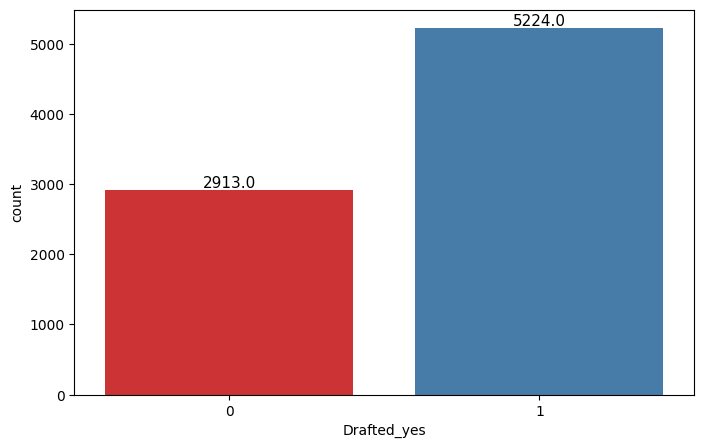

In [39]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Drafted_yes', palette='Set1')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Checking for outliers


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

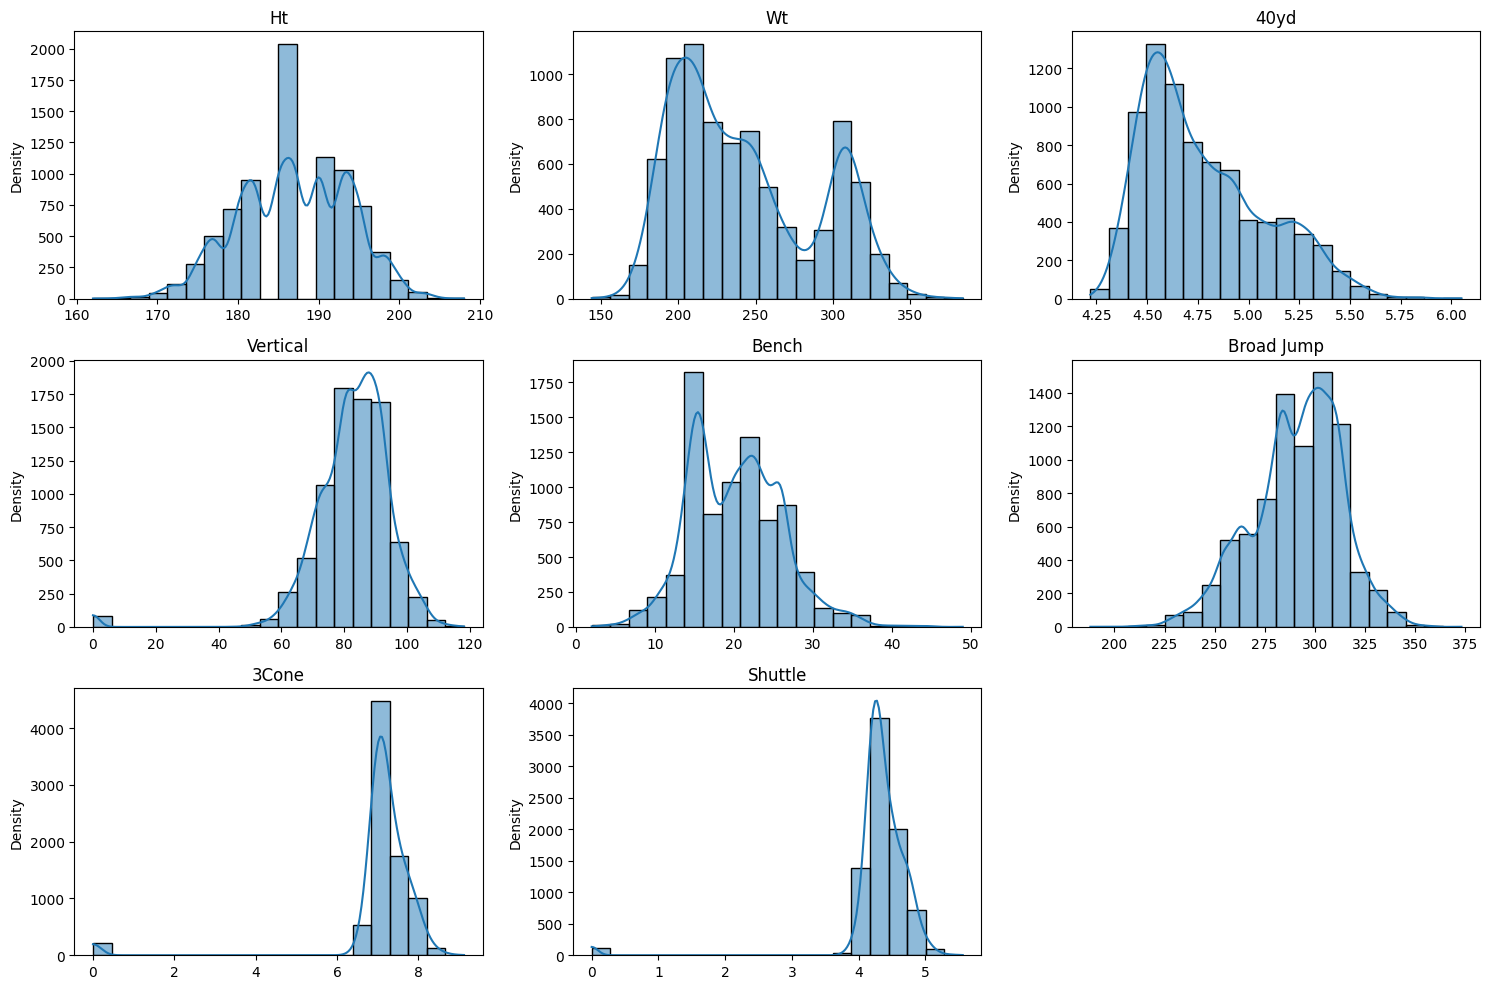

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to analyze
columns_to_analyze = ['Ht', 'Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']

# Plotting histograms for each column
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

### Drafted / not Drafted count based on position

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


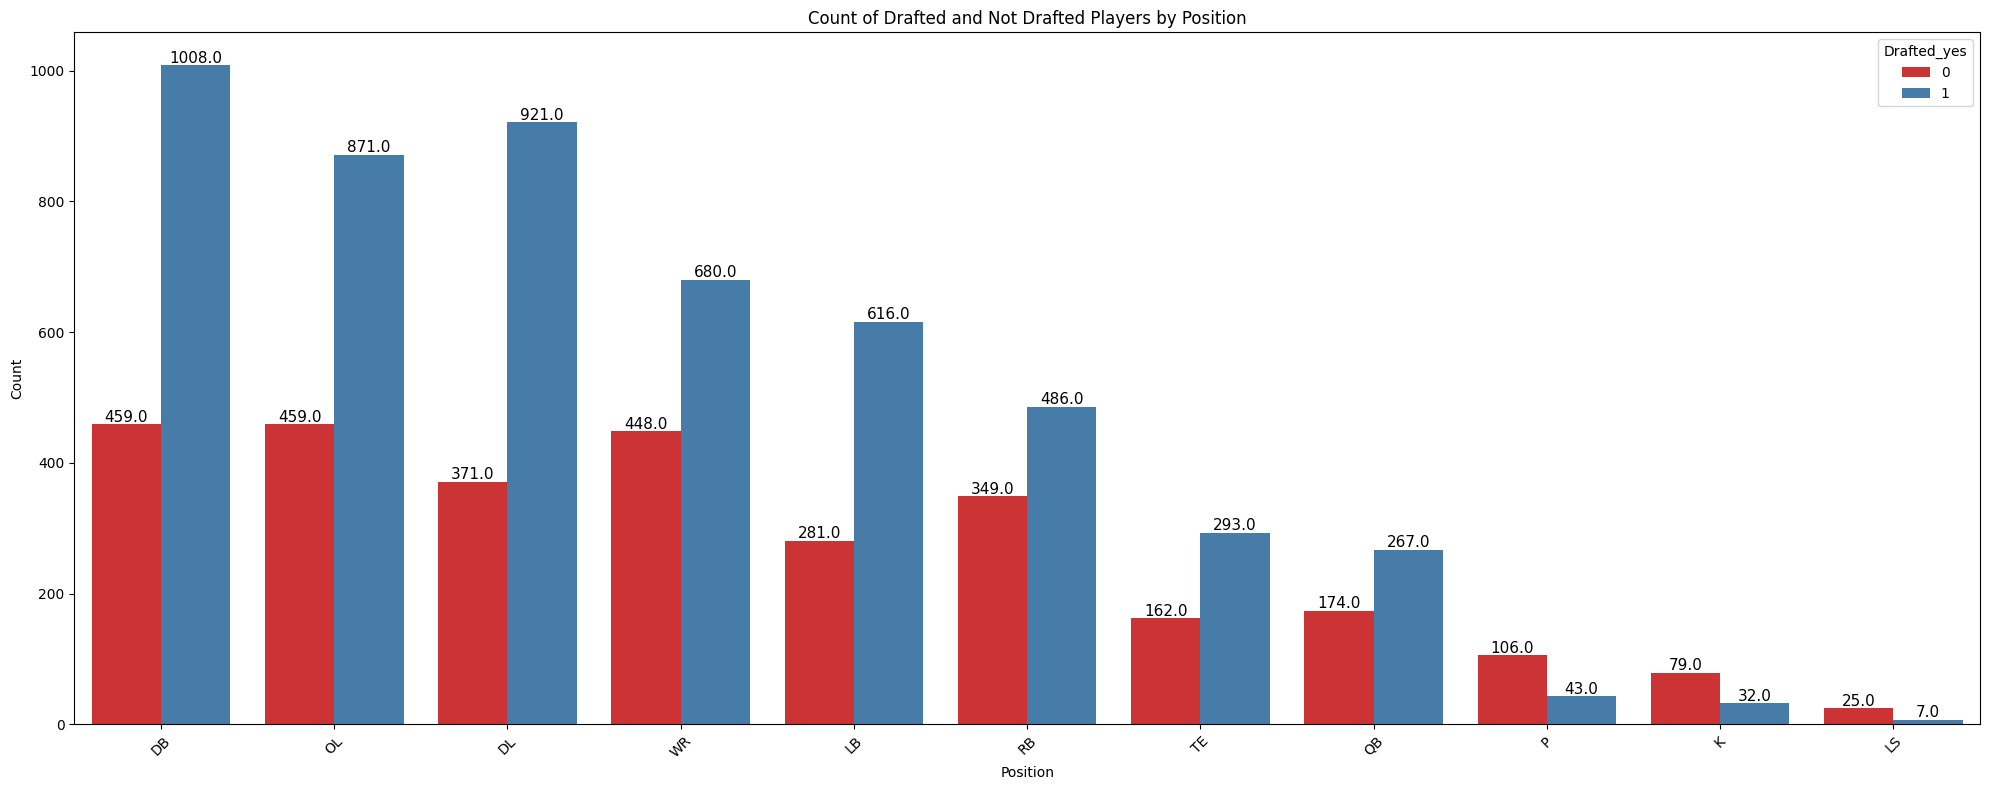

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df, x='Pos', hue='Drafted_yes', order=df['Pos'].value_counts().index, palette='Set1')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.title('Count of Drafted and Not Drafted Players by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


### Year wise average performance based on Drill

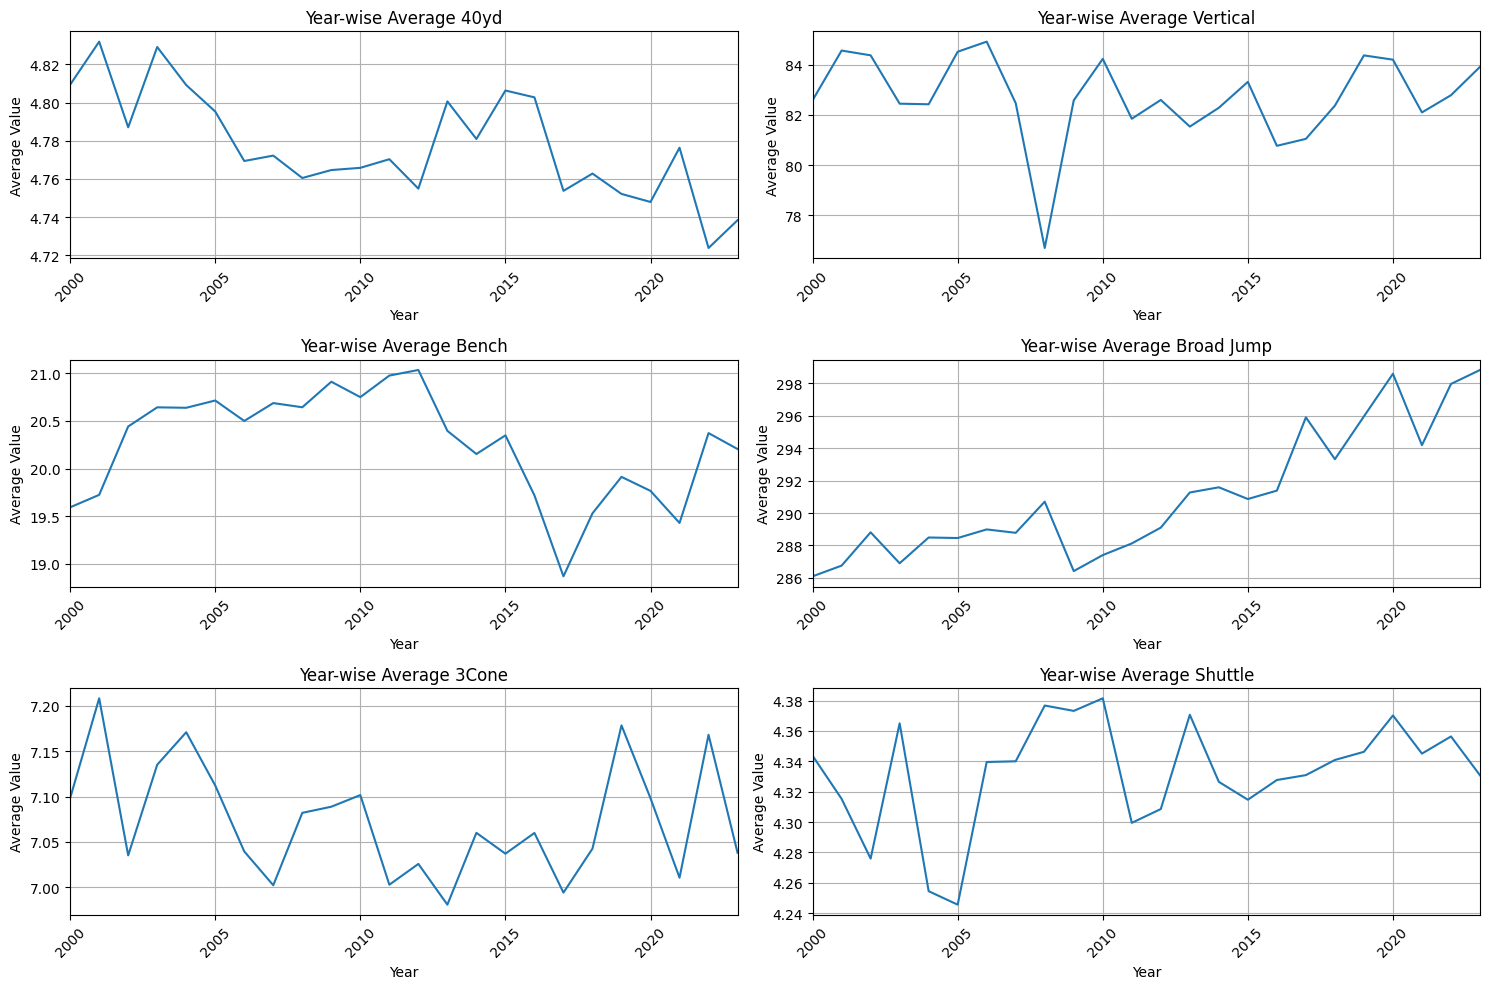

In [42]:
import matplotlib.pyplot as plt

numeric_columns = ['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']

num_rows = 3
num_cols = 2

yearly_avg = df.groupby('year')[numeric_columns].mean()

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    ax = axes[i]
    ax.plot(yearly_avg.index, yearly_avg[column])
    ax.set_title(f'Year-wise Average {column}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Value')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlim(2000, 2023)
    ax.grid(True)

plt.tight_layout() 
plt.show()


### Data points count based on position and Drill

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

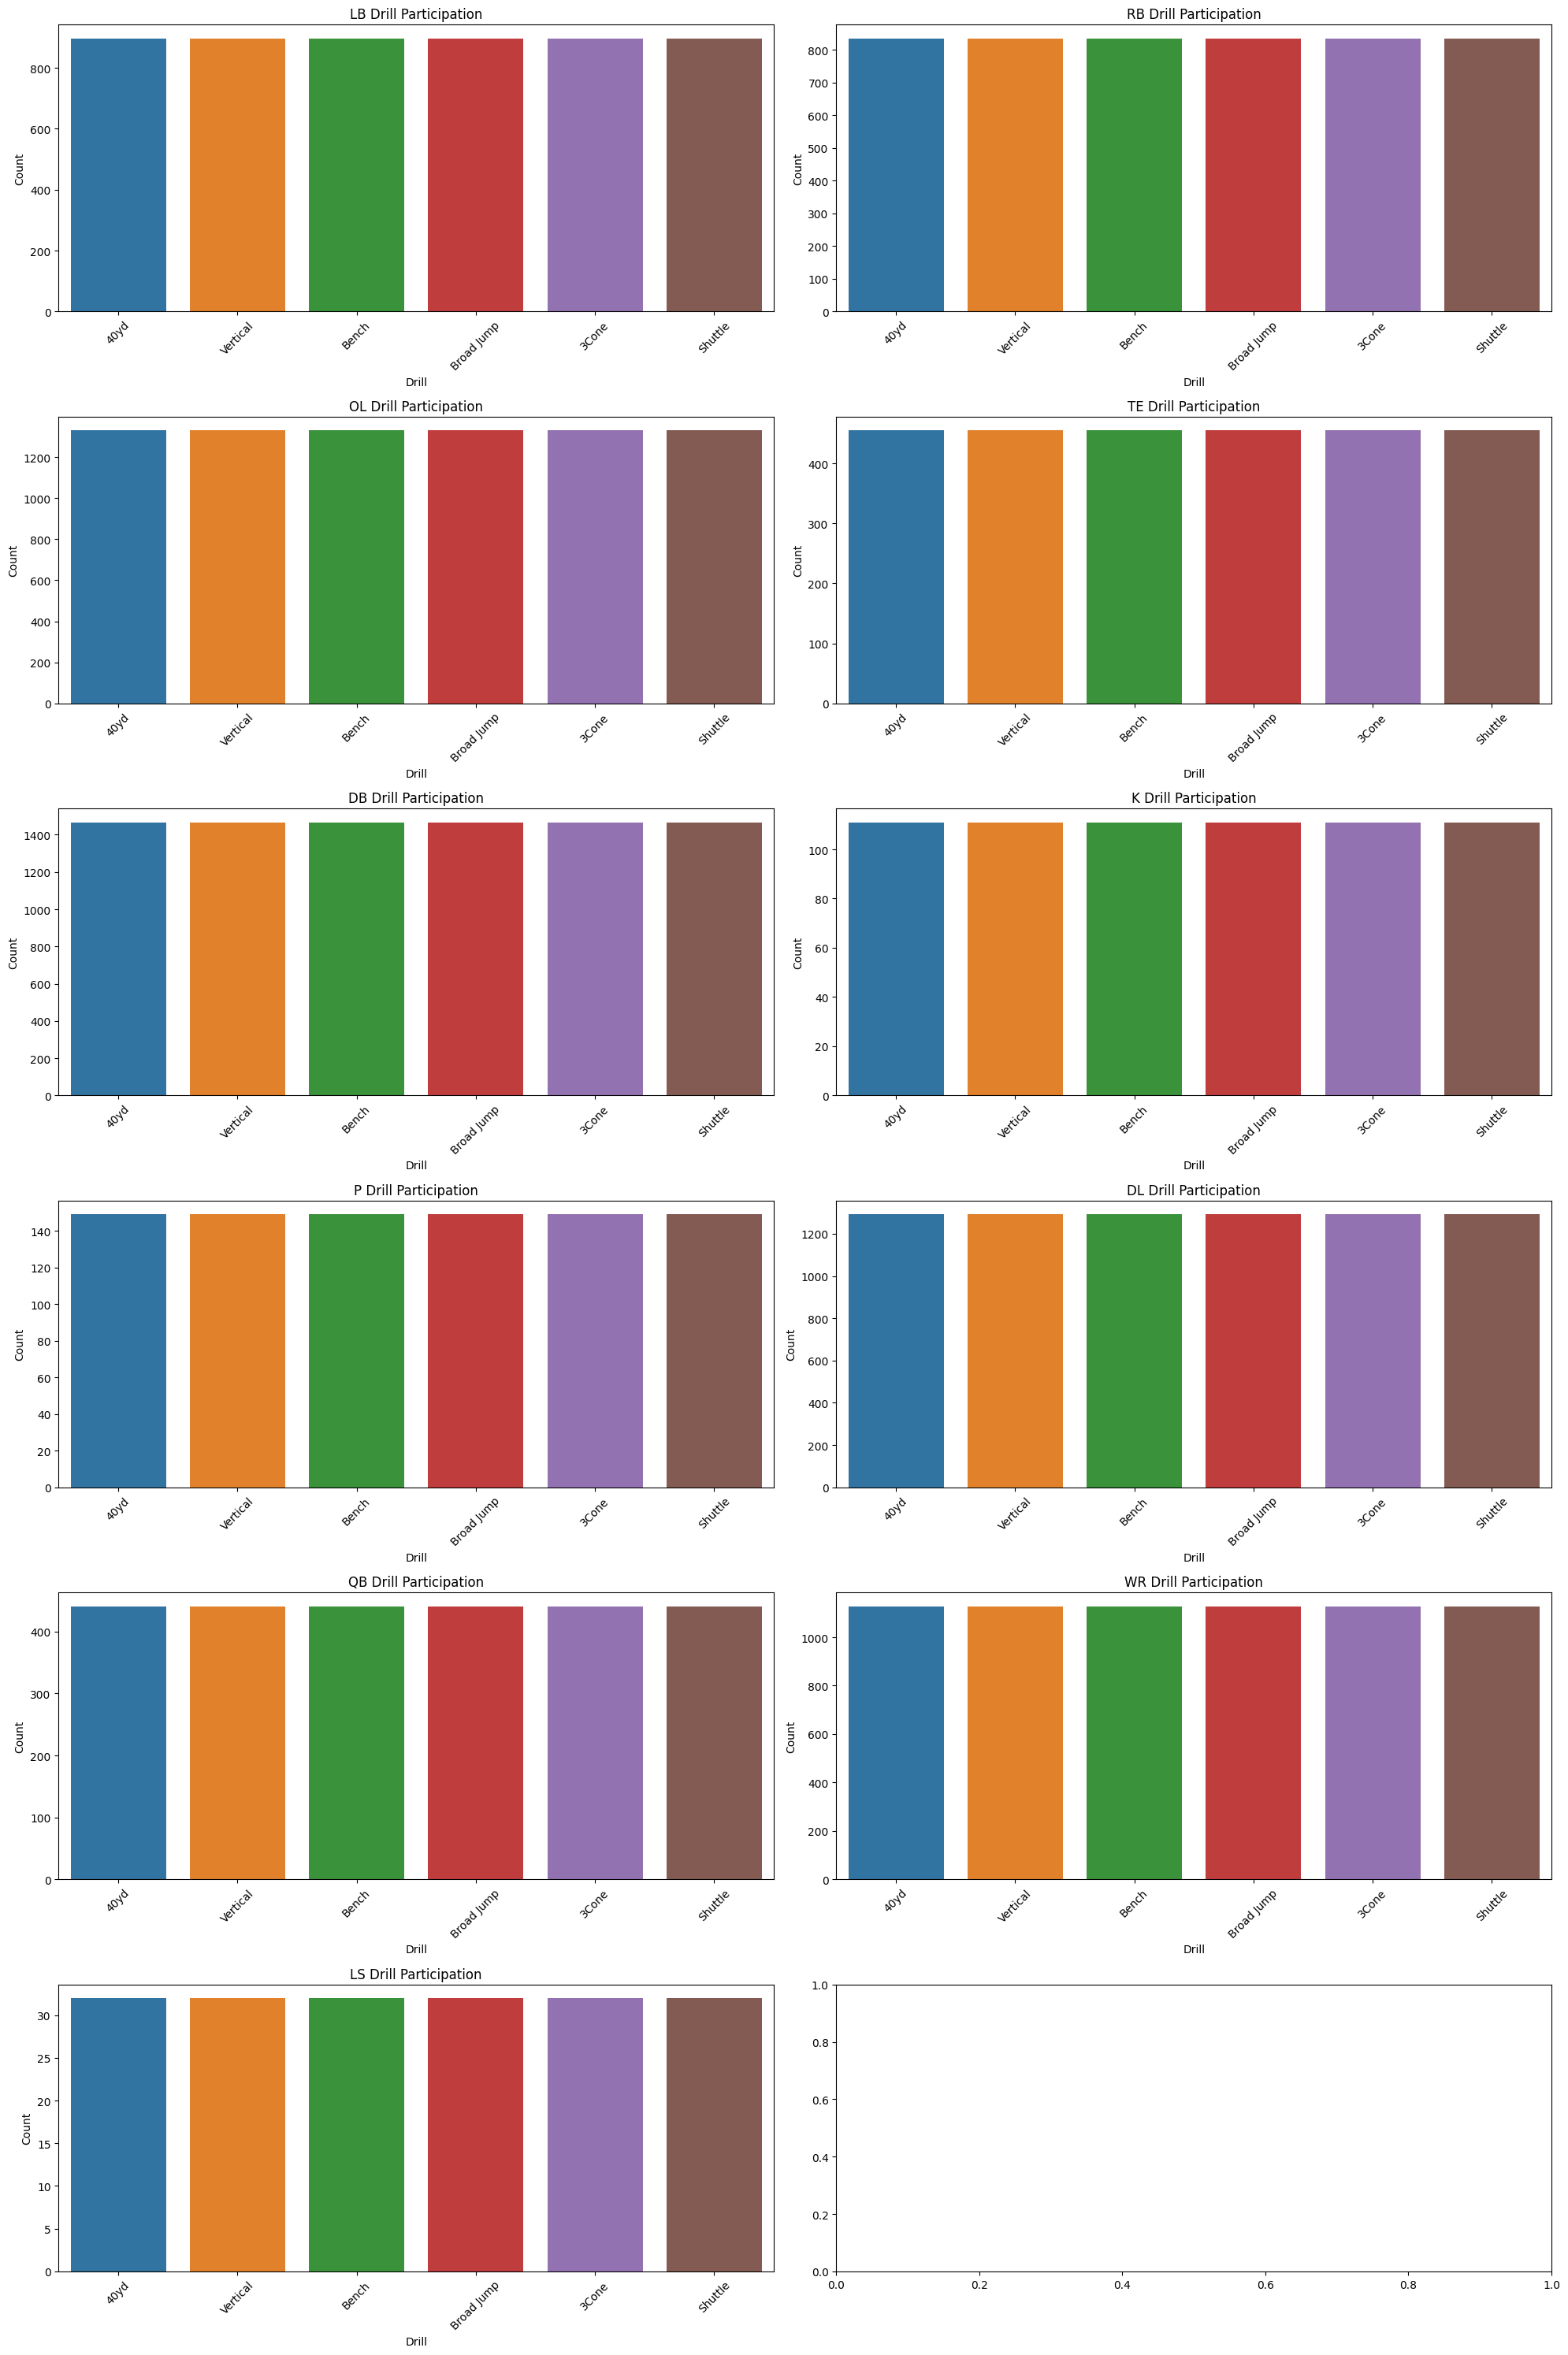

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



drills = [ '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']
 
positions = df['Pos'].unique()

n_rows = (len(positions) + 1) // 2 
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), squeeze=False)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for idx, pos in enumerate(positions):

    row = idx // n_cols
    col = idx % n_cols
    
    position_data = df[df['Pos'] == pos]
    
    drill_counts = position_data[drills].notna().sum().reset_index()
    drill_counts.columns = ['Drill', 'Count']
    
    ax = sns.barplot(x='Drill', y='Count', data=drill_counts, ax=axes[row, col])
    ax.set_title(f'{pos} Drill Participation')
    ax.set_xlabel('Drill')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Year wise drafted and not drafted count

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

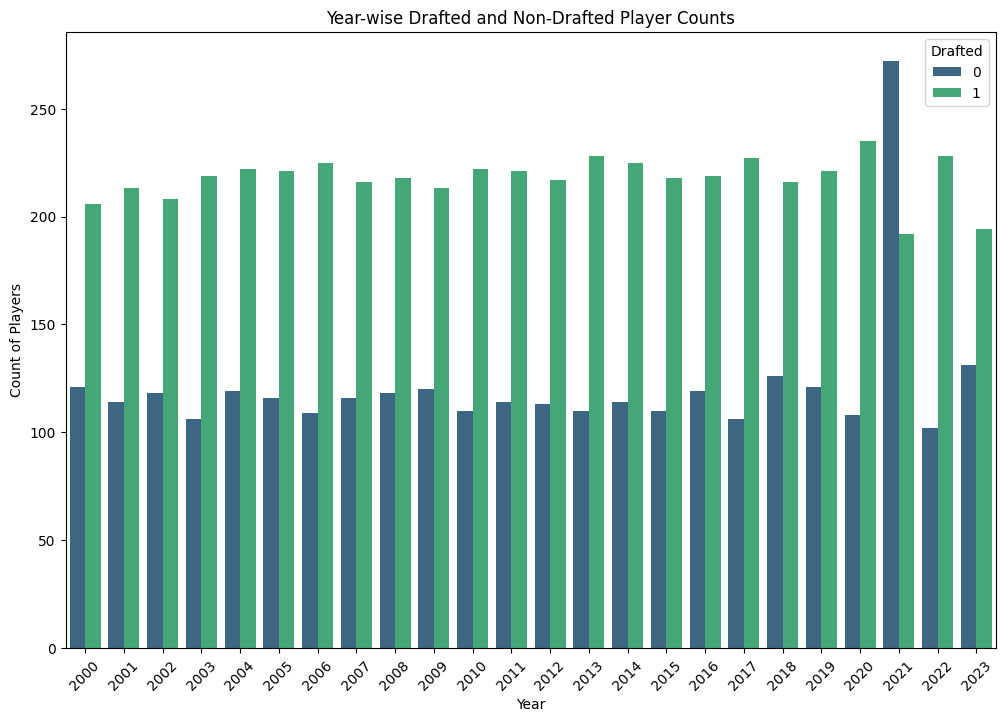

In [44]:
plt.figure(figsize=(12, 8))

sns.countplot(x='year', hue='Drafted_yes', data=df, palette='viridis')

plt.title('Year-wise Drafted and Non-Drafted Player Counts')
plt.xlabel('Year')
plt.ylabel('Count of Players')
plt.xticks(rotation=45)

plt.legend(title='Drafted')
plt.show()

### Count of drafted players by slection team

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


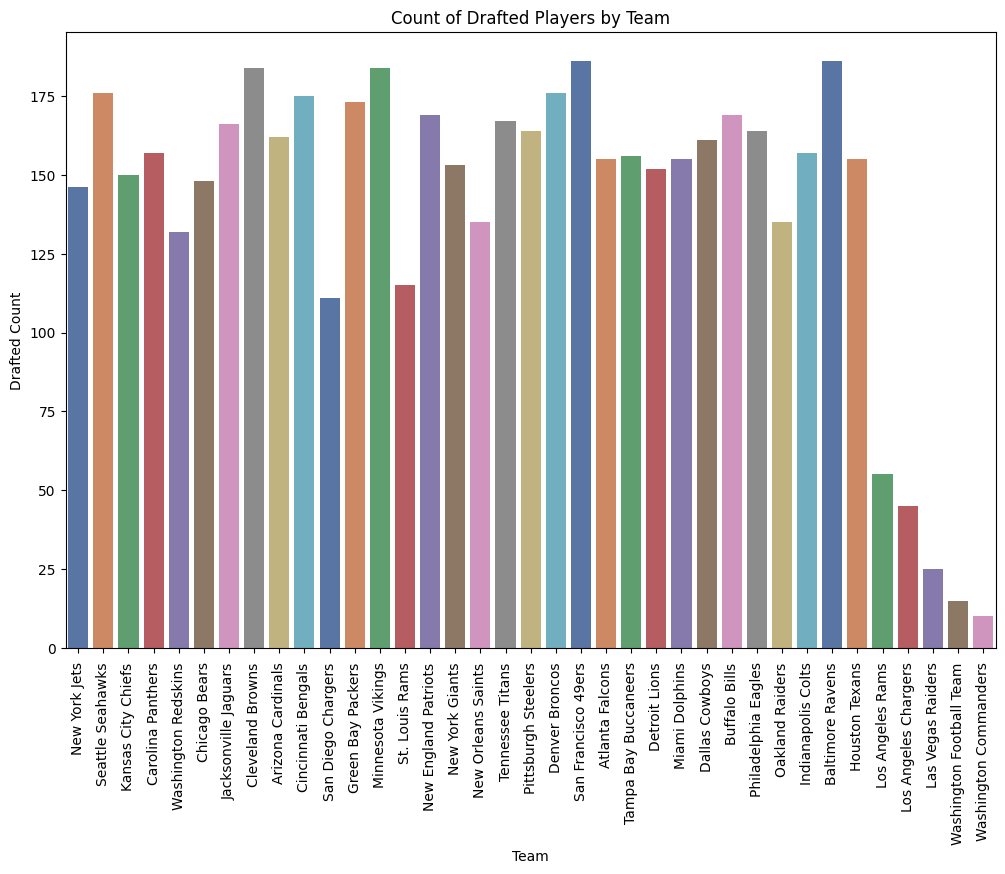

In [45]:
drafted_df = df[df['Drafted_yes'] == 1]

plt.figure(figsize=(12, 8))
sns.countplot(x = 'Drafted_Team', data = drafted_df, palette='deep')
plt.title('Count of Drafted Players by Team')
plt.xlabel('Team')
plt.ylabel('Drafted Count')
plt.xticks(rotation = 90) 
plt.show()

# Featuring Engineering

### As different positions have different important drills. Spliting the data frame into sub dataframes based on position and creating a directory for easy processing 

In [46]:
position_dict = {pos: data.drop(columns = ['Pos', 'Player', 'stats_link', 'Drafted_Team', 'Drafted_Round', 'Drafted_Pick', 'Ht', 'Wt'], axis=1) for pos, data in df.groupby('Pos')}

### To find most correlated drills that impact draft decision based on position. Creating heatmaps.

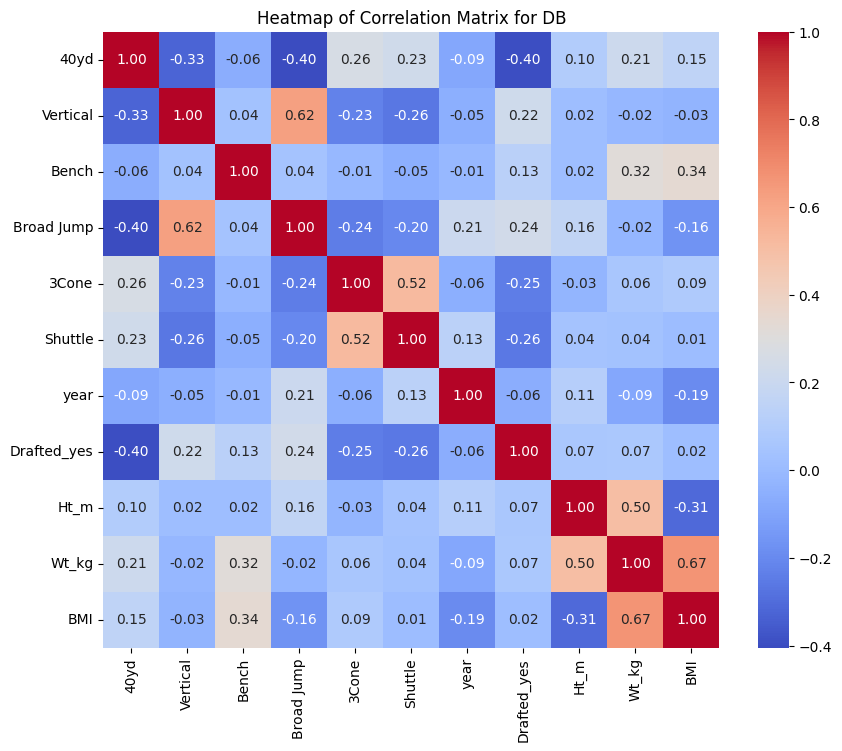

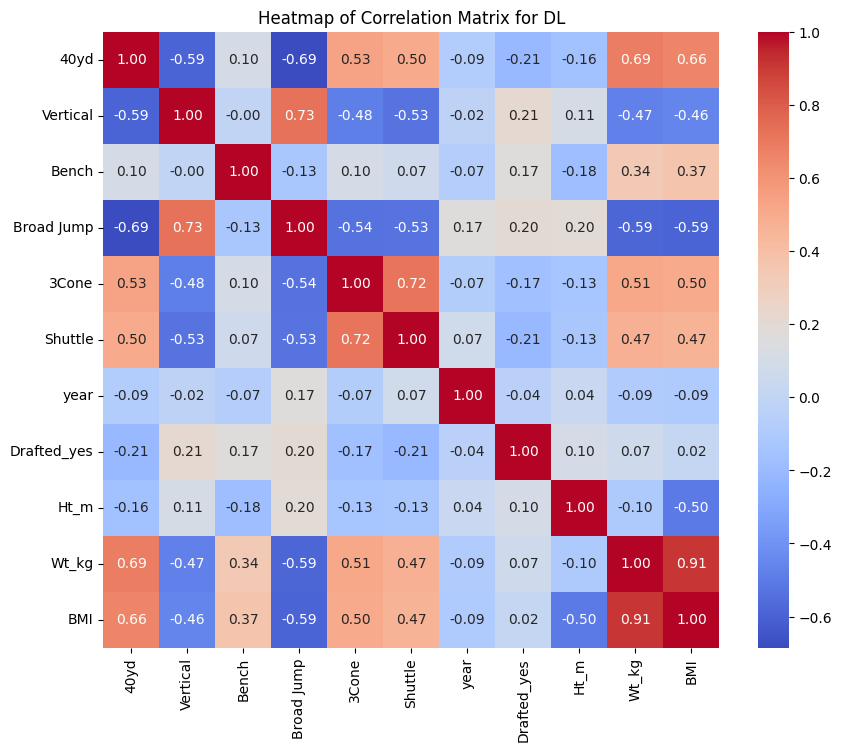

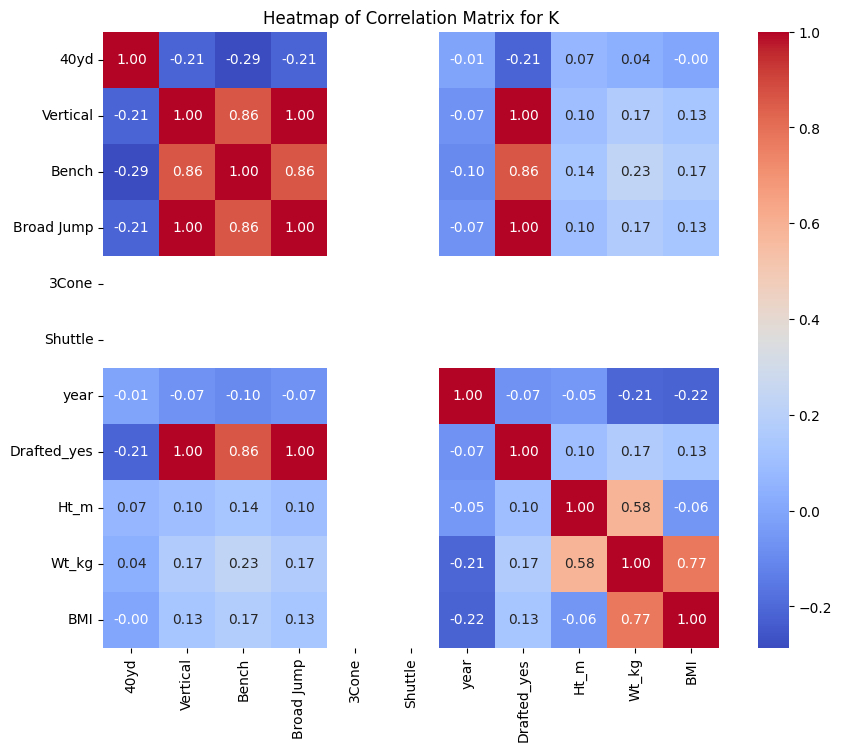

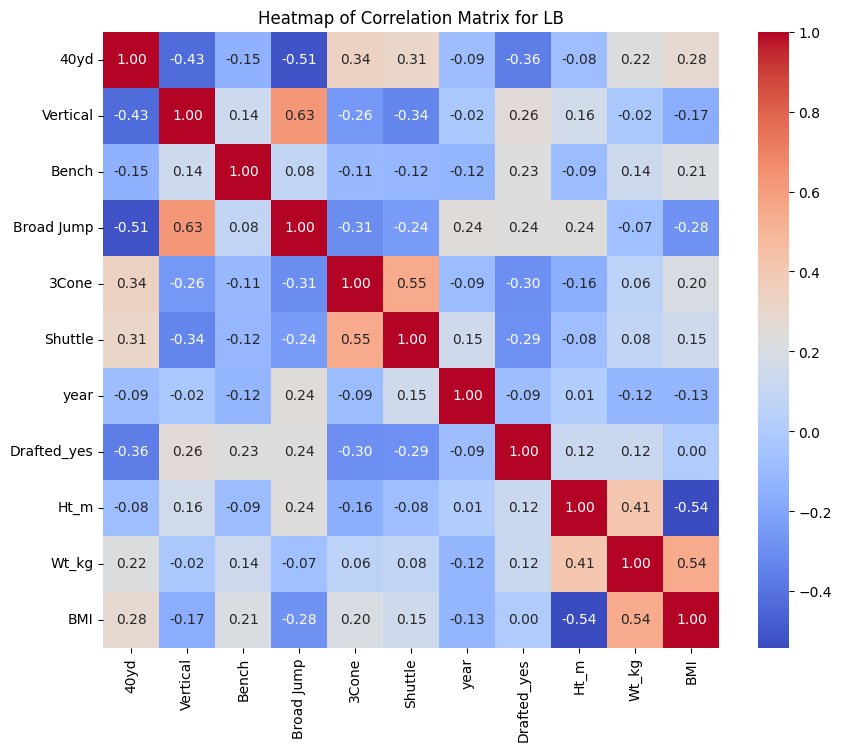

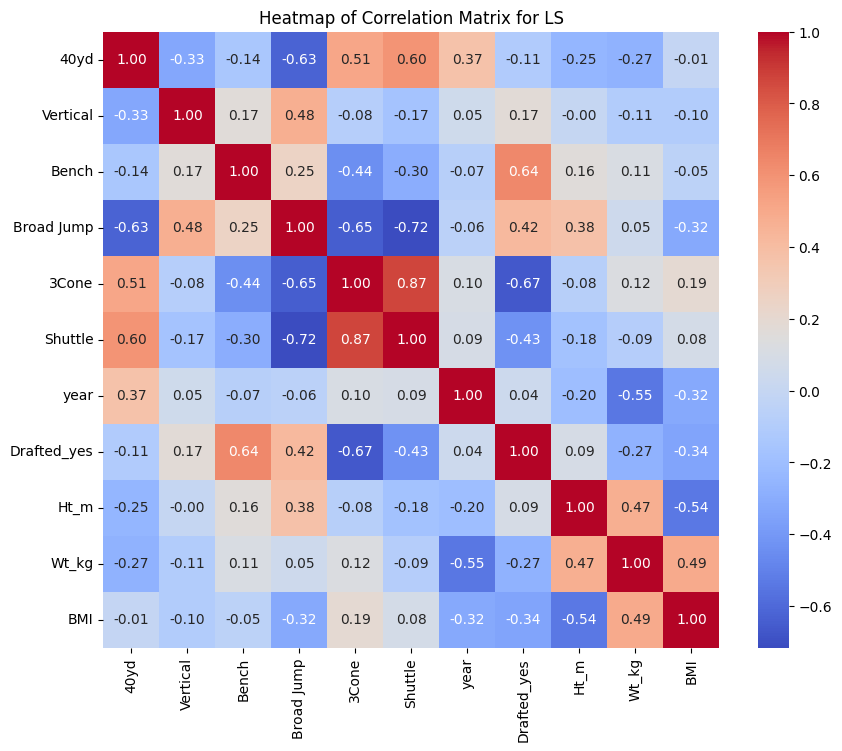

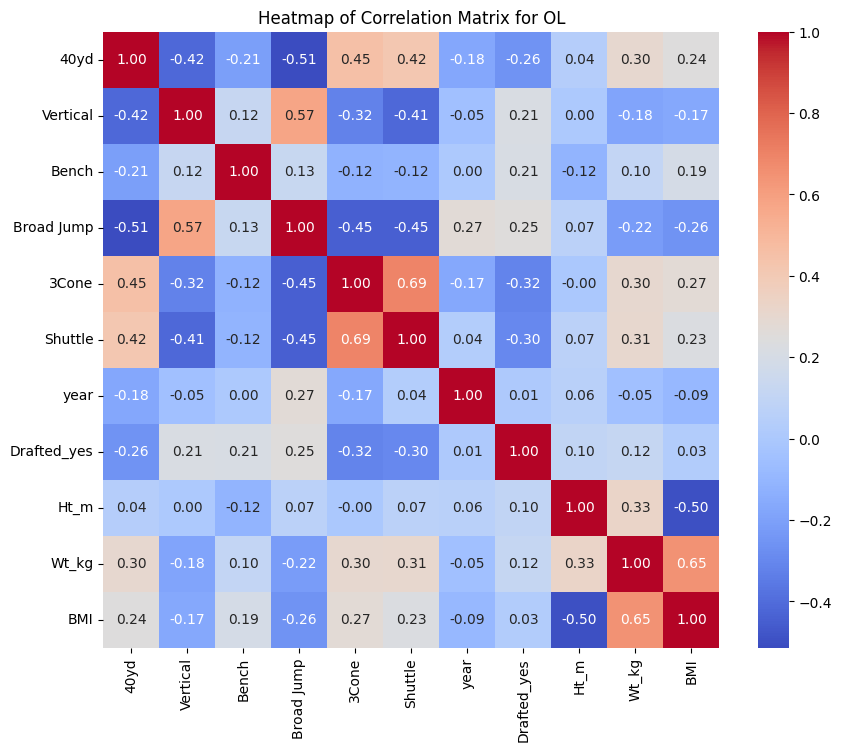

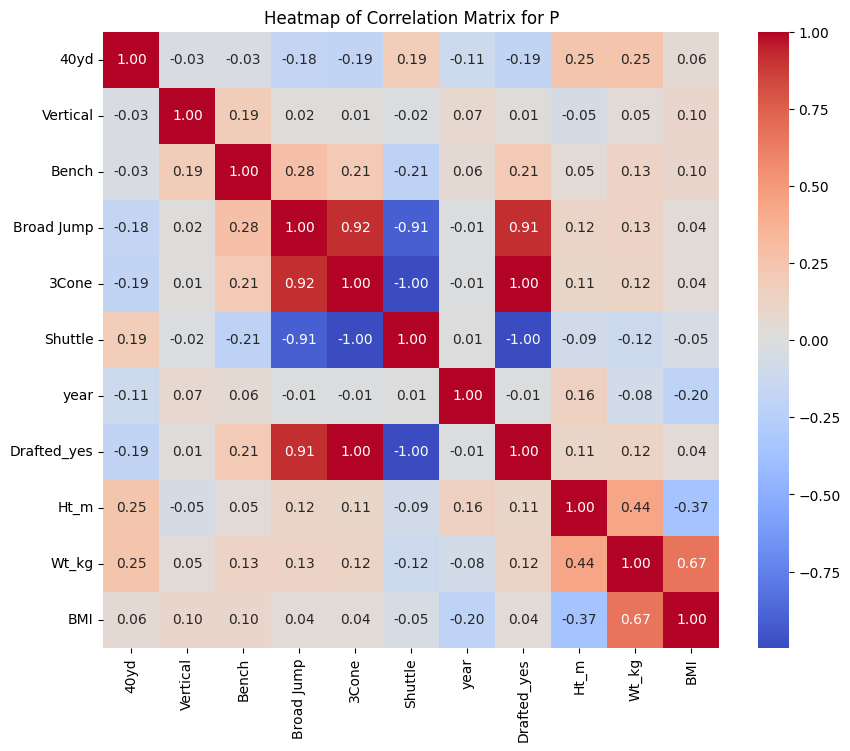

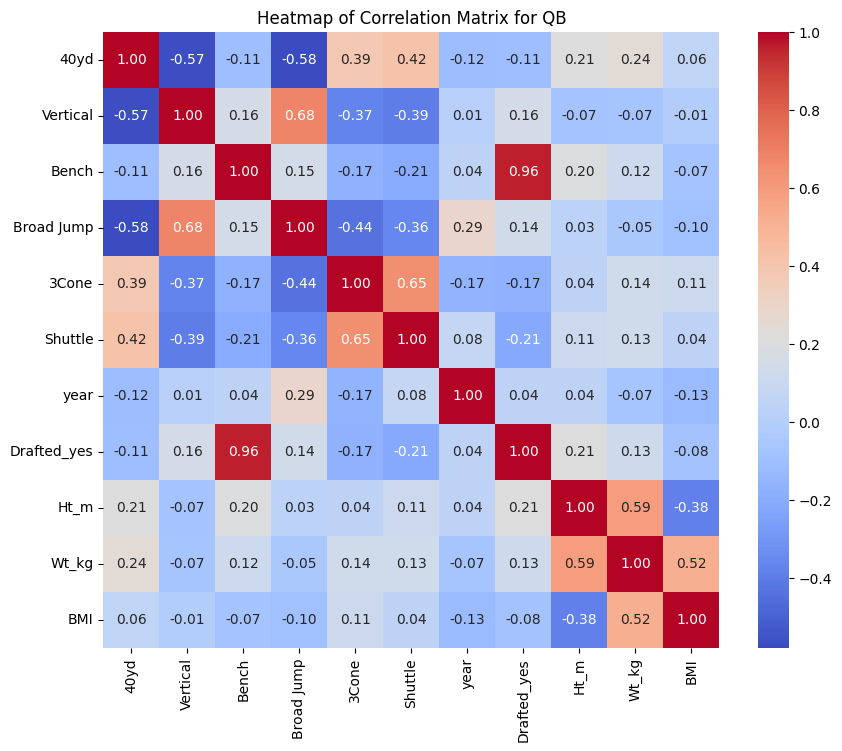

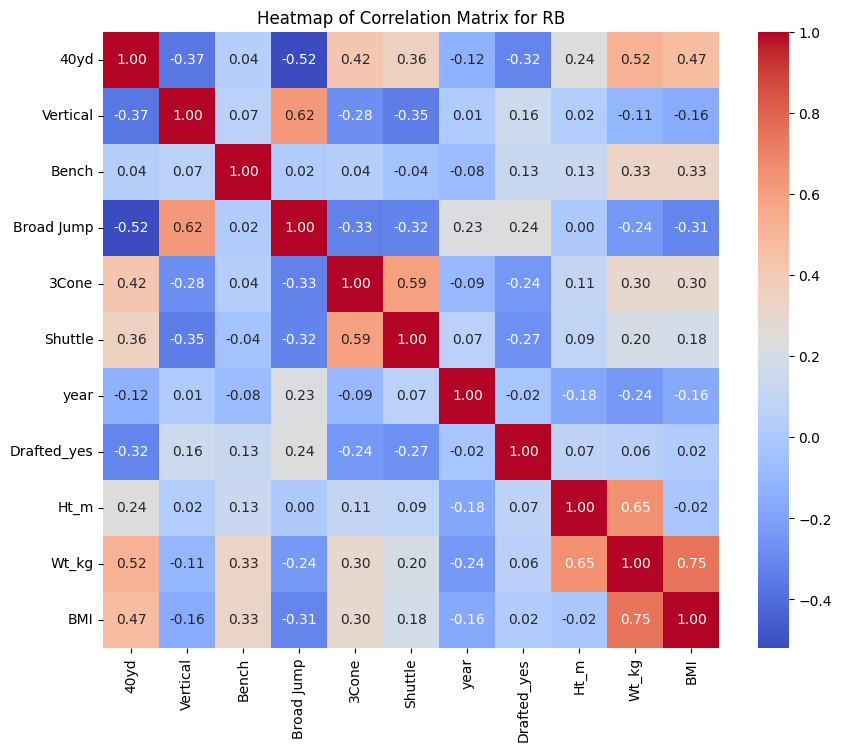

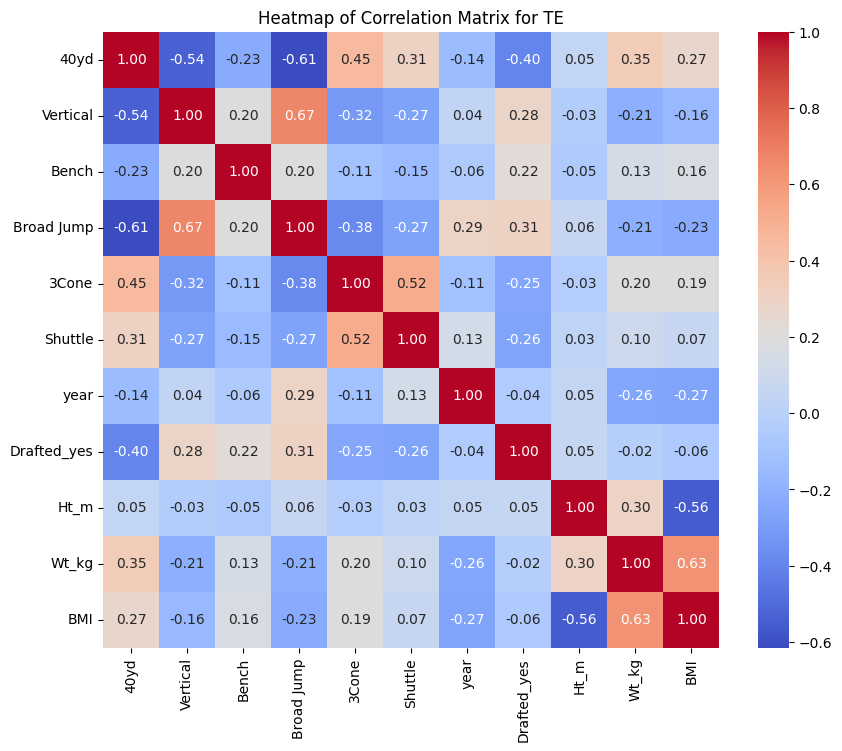

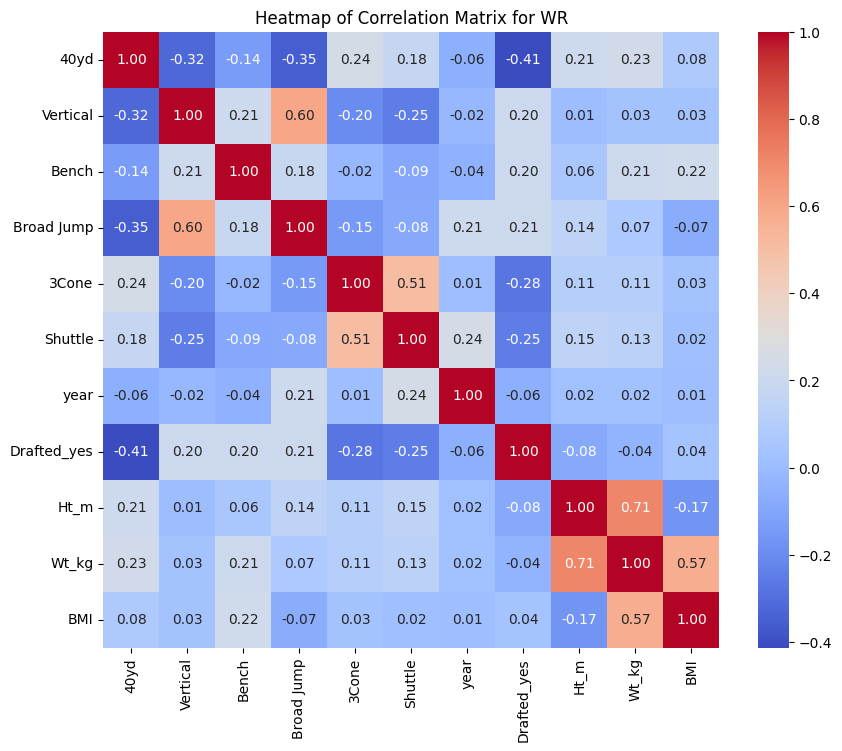

In [47]:
for position, data in position_dict.items():
    plt.figure(figsize=(10, 8))
    plt.title(f'Heatmap of Correlation Matrix for {position}')
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.show()

### Based on heatmaps filterting the directory into most correlated drills based on position.

In [48]:
columns_to_keep = {
    'LB': ['40yd', '3Cone', 'Shuttle', 'Drafted_yes'],
    'RB': ['40yd','Broad Jump' ,'Shuttle', 'Drafted_yes'],
    'OL': [ '3Cone', 'Shuttle', 'Broad Jump', 'Drafted_yes'],
    'TE': ['40yd', 'Broad Jump', 'Vertical', 'Drafted_yes'],
    'DB': ['40yd','Shuttle','3Cone', 'Drafted_yes'],
    'K': ['Vertical','Bench', 'Broad Jump', 'Drafted_yes'],
    'P': ['Broad Jump', '3Cone', 'Shuttle', 'Drafted_yes'],
    'DL': ['40yd','Vertical','Shuttle', 'Drafted_yes'],
    'QB': ['Bench', 'Shuttle', 'Ht_m', 'Drafted_yes'],
    'WR': ['40yd','3Cone','Shuttle', 'Drafted_yes'],
    'LS': ['3Cone', 'Bench', 'Shuttle', 'Drafted_yes']
}

In [49]:
for position, df in position_dict.items():

    if position in columns_to_keep:
        df = df[columns_to_keep[position]]
        position_dict[position] = df 

### Split data frames into train and test sets.

In [50]:
from sklearn.model_selection import train_test_split


def split_data(df_dict, test_size=0.2, random_state=None):
    
    split_dict = {}
    for position, data in df_dict.items():
        
        X = data.drop(['Drafted_yes'], axis=1)
        y = data['Drafted_yes']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        split_dict[position] = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
    return split_dict

In [51]:
Train_Test_Data = split_data(position_dict)

In [52]:
Train_Test_Data

{'DB': {'X_train':           40yd   Shuttle     3Cone
  5571  4.730000  4.233929  7.032778
  3374  4.620000  4.410000  7.360000
  3203  4.490000  4.260000  6.810000
  2986  4.480000  4.300000  6.930000
  2316  4.570000  4.167955  6.945298
  ...        ...       ...       ...
  716   4.620000  4.167955  6.945298
  7983  4.460000  4.167955  6.945298
  6819  4.579093  4.233929  7.032778
  5820  4.540000  4.167955  6.945298
  6514  4.520000  4.100000  7.010000
  
  [1173 rows x 3 columns],
  'X_test':           40yd   Shuttle     3Cone
  194   4.540000  4.090000  6.900000
  1816  4.430000  4.100000  7.150000
  2728  4.390000  4.167955  6.945298
  5749  4.493197  4.167955  6.945298
  2170  4.420000  4.167955  6.945298
  ...        ...       ...       ...
  6162  4.580000  4.233929  7.032778
  1543  4.350000  3.910000  6.700000
  4174  4.470000  4.167955  6.945298
  7019  4.450000  4.130000  6.690000
  8107  4.470000  4.167955  6.945298
  
  [294 rows x 3 columns],
  'y_train': 5571    0
  3

# Machine Learning Models

### RandomForest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

def train_and_evaluate(models_dict):
    results = {}
    for position, datasets in models_dict.items():
        # Retrieve the data
        X_train = datasets['X_train']
        X_test = datasets['X_test']
        y_train = datasets['y_train']
        y_test = datasets['y_test']

        # Create a pipeline with a scaler and classifier
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', RandomForestClassifier(random_state=42))
        ])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Predict on the test set
        y_pred = pipeline.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Calculate precision, recall, and F1-score
        class_report = classification_report(y_test, y_pred, output_dict=True)
        
        # Storing results
        results[position] = {
            'Accuracy': accuracy,
            'Precision': class_report['weighted avg']['precision'],
            'Recall': class_report['weighted avg']['recall'],
            'F1 Score': class_report['weighted avg']['f1-score']
        }

        # Print detailed classification report
        print(f"Results for {position}:")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {class_report['weighted avg']['precision']:.2f}")
        print(f"Recall: {class_report['weighted avg']['recall']:.2f}")
        print(f"F1 Score: {class_report['weighted avg']['f1-score']:.2f}")
        print()  # for spacing

    return results

In [54]:
RF_Results = train_and_evaluate(Train_Test_Data)

Results for DB:
Accuracy: 0.82
Precision: 0.81
Recall: 0.82
F1 Score: 0.82

Results for DL:
Accuracy: 0.79
Precision: 0.78
Recall: 0.79
F1 Score: 0.78

Results for K:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Results for LB:
Accuracy: 0.82
Precision: 0.81
Recall: 0.82
F1 Score: 0.81

Results for LS:
Accuracy: 0.71
Precision: 0.81
Recall: 0.71
F1 Score: 0.67

Results for OL:
Accuracy: 0.76
Precision: 0.75
Recall: 0.76
F1 Score: 0.74

Results for P:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Results for QB:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99

Results for RB:
Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1 Score: 0.77

Results for TE:
Accuracy: 0.67
Precision: 0.67
Recall: 0.67
F1 Score: 0.66

Results for WR:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1 Score: 0.74



### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

def train_and_evaluate_LR(models_dict):
    results = {}
    for position, datasets in models_dict.items():
        # Retrieve the data
        X_train = datasets['X_train']
        X_test = datasets['X_test']
        y_train = datasets['y_train']
        y_test = datasets['y_test']

        # Create a pipeline with a scaler and classifier
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(random_state=42))
        ])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Predict on the test set
        y_pred = pipeline.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Calculate precision, recall, and F1-score
        class_report = classification_report(y_test, y_pred, output_dict=True)
        
        # Storing results
        results[position] = {
            'Accuracy': accuracy,
            'Precision': class_report['weighted avg']['precision'],
            'Recall': class_report['weighted avg']['recall'],
            'F1 Score': class_report['weighted avg']['f1-score']
        }

        # Print detailed classification report
        print(f"Results for {position}:")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {class_report['weighted avg']['precision']:.2f}")
        print(f"Recall: {class_report['weighted avg']['recall']:.2f}")
        print(f"F1 Score: {class_report['weighted avg']['f1-score']:.2f}")
        print()  # for spacing

    return results

In [56]:
LR_results = train_and_evaluate_LR(Train_Test_Data)

Results for DB:
Accuracy: 0.78
Precision: 0.77
Recall: 0.78
F1 Score: 0.76

Results for DL:
Accuracy: 0.70
Precision: 0.64
Recall: 0.70
F1 Score: 0.64

Results for K:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Results for LB:
Accuracy: 0.73
Precision: 0.70
Recall: 0.73
F1 Score: 0.70

Results for LS:
Accuracy: 0.86
Precision: 0.89
Recall: 0.86
F1 Score: 0.85

Results for OL:
Accuracy: 0.67
Precision: 0.65
Recall: 0.67
F1 Score: 0.62

Results for P:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Results for QB:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Results for RB:
Accuracy: 0.71
Precision: 0.70
Recall: 0.71
F1 Score: 0.70

Results for TE:
Accuracy: 0.65
Precision: 0.65
Recall: 0.65
F1 Score: 0.63

Results for WR:
Accuracy: 0.65
Precision: 0.65
Recall: 0.65
F1 Score: 0.65



### Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


def train_decision_trees(models_dict):
    results = {}
    for position, datasets in models_dict.items():
        X_train = datasets['X_train']
        X_test = datasets['X_test']
        y_train = datasets['y_train']
        y_test = datasets['y_test']

        # Initialize the Decision Tree Classifier
        tree_clf = DecisionTreeClassifier()

        # Train the model
        tree_clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = tree_clf.predict(X_test)

        # Calculate accuracy and generate a classification report
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        # Store results
        results[position] = {
            'Model': tree_clf,
            'Accuracy': accuracy,
            'Classification Report': report
        }

        # Optionally print results
        print(f"Results for {position}:")
        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:")
        print(report)

    return results

In [58]:
DT_results = train_decision_trees(Train_Test_Data)

Results for DB:
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        87
           1       0.89      0.86      0.87       207

    accuracy                           0.82       294
   macro avg       0.79      0.80      0.79       294
weighted avg       0.83      0.82      0.83       294

Results for DL:
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.57        73
           1       0.83      0.83      0.83       186

    accuracy                           0.76       259
   macro avg       0.70      0.70      0.70       259
weighted avg       0.76      0.76      0.76       259

Results for K:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         7

    accuracy         

## K Neighbors Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


def train_knn_classifiers(models_dict):
    results = {}
    for position, datasets in models_dict.items():
        X_train = datasets['X_train']
        X_test = datasets['X_test']
        y_train = datasets['y_train']
        y_test = datasets['y_test']

        # Initialize the KNN Classifier
        knn_clf = KNeighborsClassifier()

        # Train the model
        knn_clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = knn_clf.predict(X_test)

        # Calculate accuracy and generate a classification report
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        # Store results
        results[position] = {
            'Model': knn_clf,
            'Accuracy': accuracy,
            'Classification Report': report
        }

        # Optionally print results
        print(f"Results for {position}:")
        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:")
        print(report)

    return results

In [60]:
KNN_results = train_knn_classifiers(Train_Test_Data)

Results for DB:
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        87
           1       0.83      0.88      0.86       207

    accuracy                           0.79       294
   macro avg       0.75      0.72      0.73       294
weighted avg       0.78      0.79      0.78       294

Results for DL:
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.36      0.45        73
           1       0.78      0.91      0.84       186

    accuracy                           0.75       259
   macro avg       0.69      0.63      0.64       259
weighted avg       0.73      0.75      0.73       259

Results for K:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         7

    accuracy         

# Voting classifier to make collective decision using soft voting method.

#### voting classifier using Logistic Regression, Decision Tree Classifier and K-Nearest Neighbors

In [61]:
from sklearn.ensemble import VotingClassifier


# Define the training and evaluation function
def train_voting_classifier(models_dict):
    results = {}
    for position, datasets in models_dict.items():
        # Unpack datasets
        X_train = datasets['X_train']
        X_test = datasets['X_test']
        y_train = datasets['y_train']
        y_test = datasets['y_test']

        # Setup classifiers and voting classifier
        log_clf = LogisticRegression(max_iter=1000)
        df_clf = DecisionTreeClassifier()
        knn_clf = KNeighborsClassifier()
        voting_clf = VotingClassifier(
            estimators=[('lr', log_clf), ('rf', df_clf), ('knn', knn_clf)],
            voting='soft'
        )
        voting_clf.fit(X_train, y_train)
        y_pred = voting_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        # Store and print results
        results[position] = {'Model': voting_clf, 'Accuracy': accuracy, 'Classification Report': report}

    return results

In [62]:
Voting_classifier = train_voting_classifier(Train_Test_Data)

In [63]:
print(Voting_classifier)

{'DB': {'Model': VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft'), 'Accuracy': 0.826530612244898, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.72      0.68      0.70        87\n           1       0.87      0.89      0.88       207\n\n    accuracy                           0.83       294\n   macro avg       0.79      0.78      0.79       294\nweighted avg       0.82      0.83      0.82       294\n'}, 'DL': {'Model': VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft'), 'Accuracy': 0.749034749034749, 'Classification Report': '              precision    recall  f1-score   support

#### voting classifier using Logistic Regression, Random Forest and K-Nearest Neighbors

In [64]:
from sklearn.ensemble import VotingClassifier


# Define the training and evaluation function
def train_voting_classifier2(models_dict):
    results = {}
    for position, datasets in models_dict.items():
        # Unpack datasets
        X_train = datasets['X_train']
        X_test = datasets['X_test']
        y_train = datasets['y_train']
        y_test = datasets['y_test']

        # Setup classifiers and voting classifier
        log_clf = LogisticRegression(max_iter=1000)
        rf_clf = RandomForestClassifier(random_state=42)
        knn_clf = KNeighborsClassifier()
        voting_clf2 = VotingClassifier(
            estimators=[('lr', log_clf), ('rf', rf_clf), ('knn', knn_clf)],
            voting='soft'
        )
        voting_clf2.fit(X_train, y_train)
        y_pred = voting_clf2.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        # Store and print results
        results[position] = {'Model': voting_clf2, 'Accuracy': accuracy, 'Classification Report': report}

    return results

In [65]:
Voting_classifier2 = train_voting_classifier2(Train_Test_Data)

print(Voting_classifier2)

{'DB': {'Model': VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft'), 'Accuracy': 0.8333333333333334, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.82      0.56      0.67        87\n           1       0.84      0.95      0.89       207\n\n    accuracy                           0.83       294\n   macro avg       0.83      0.76      0.78       294\nweighted avg       0.83      0.83      0.82       294\n'}, 'DL': {'Model': VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft'), 'Accuracy': 0.7683397683397684, 'Classification Report': '              precisi

# Choosing Random forest classifier as the ML model as it gave best results

## creating function for manual prediction

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

def train_and_evaluate(data_dict):
    model_dict = {}
    for position, datasets in data_dict.items():
        # Retrieve the data
        X_train = datasets['X_train']
        X_test = datasets['X_test']
        y_train = datasets['y_train']
        y_test = datasets['y_test']

        # Create a pipeline with a scaler and classifier
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', RandomForestClassifier(random_state=42))
        ])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Predict on the test set
        y_pred = pipeline.predict(X_test)

        # Calculate accuracy and other metrics
        accuracy = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Store results and the model in the dictionary
        model_dict[position] = {
            'Model': pipeline,
            'Accuracy': accuracy,
            'Precision': class_report['weighted avg']['precision'],
            'Recall': class_report['weighted avg']['recall'],
            'F1 Score': class_report['weighted avg']['f1-score'],
            'X_test': X_test,  # Optional: Store X_test if needed for future predictions
            'y_test': y_test   # Optional: Store y_test for further evaluation or demonstration
        }

        # Print detailed classification report
        print(f"Results for {position}:")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {class_report['weighted avg']['precision']:.2f}")
        print(f"Recall: {class_report['weighted avg']['recall']:.2f}")
        print(f"F1 Score: {class_report['weighted avg']['f1-score']:.2f}")
        print(f"conf_matrix:{conf_matrix}")
        print()  # for spacing

    return model_dict


In [67]:
# Assuming `train_test_data` is your dataset dictionary structured as required
model_dict = train_and_evaluate(Train_Test_Data)


Results for DB:
Accuracy: 0.82
Precision: 0.81
Recall: 0.82
F1 Score: 0.82
conf_matrix:[[ 54  33]
 [ 20 187]]

Results for DL:
Accuracy: 0.79
Precision: 0.78
Recall: 0.79
F1 Score: 0.78
conf_matrix:[[ 38  35]
 [ 20 166]]

Results for K:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
conf_matrix:[[16  0]
 [ 0  7]]

Results for LB:
Accuracy: 0.82
Precision: 0.81
Recall: 0.82
F1 Score: 0.81
conf_matrix:[[ 29  24]
 [  9 118]]

Results for LS:
Accuracy: 0.71
Precision: 0.81
Recall: 0.71
F1 Score: 0.67
conf_matrix:[[4 0]
 [2 1]]

Results for OL:
Accuracy: 0.76
Precision: 0.75
Recall: 0.76
F1 Score: 0.74
conf_matrix:[[ 50  46]
 [ 19 151]]

Results for P:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
conf_matrix:[[24  0]
 [ 0  6]]

Results for QB:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
conf_matrix:[[38  1]
 [ 0 50]]

Results for RB:
Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1 Score: 0.77
conf_matrix:[[46 19]
 [20 82]]

Results for TE:
Accuracy: 0

## Saving Random Forest Classifier funtion return object into a pickle file for future use

In [68]:
import pickle

with open('model_dict.pkl', 'wb') as f:
    pickle.dump(model_dict, f)


In [69]:
with open('model_dict.pkl', 'rb') as f:
    loaded_model_dict = pickle.load(f)


# Model testing using user input values

# Comparetive Analysis: If player is not drafted. Then we are comparing user input values with players performance who are drafted.

Enter the following features for position 'QB':
The prediction for the input data is: Not Drafted


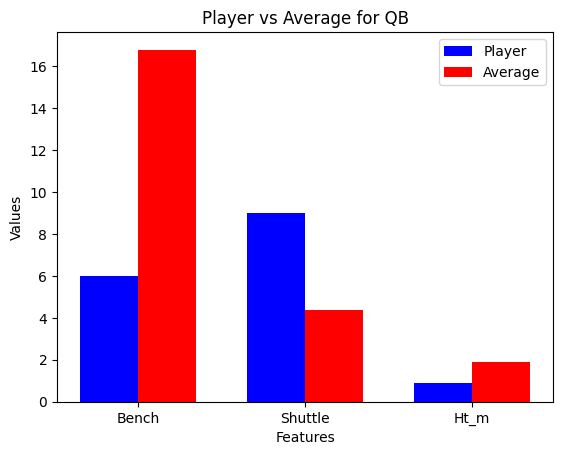

In [80]:
import pickle
import pandas as pd

# Function to load the model dictionary
def load_model_dict(filename='model_dict.pkl'):
    with open(filename, 'rb') as f:
        return pickle.load(f)

# Function to collect user input for the specified position
def collect_user_input(model_dict, input_position):
    if input_position not in model_dict:
        print(f"No model available for position '{input_position}'. Please check the position name.")
        return None

    feature_names = model_dict[input_position]['X_test'].columns
    print(f"Enter the following features for position '{input_position}':")

    user_inputs = []
    for feature in feature_names:
        while True:
            try:
                value = float(input(f"{feature}: "))
                user_inputs.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")
    
    return user_inputs

# Function to predict draft status based on user inputs
def predict_draft_status(model_dict, input_position, input_features):
    if not input_features:
        return "No input provided."

    model = model_dict[input_position]['Model']
    feature_names = model_dict[input_position]['X_test'].columns
    input_df = pd.DataFrame([input_features], columns=feature_names)
    
    prediction = model.predict(input_df)
    return 'Drafted' if prediction[0] == 1 else 'Not Drafted'
    
def calculate_feature_averages(data_dict):
    averages_dict = {}
    for position, datasets in data_dict.items():
        X_train = datasets['X_train']
        averages_dict[position] = X_train.mean()
    return averages_dict

def compare_player_to_average(model_dict, position, input_features):
    if position not in model_dict:
        print("No data available for this position.")
        return

    feature_names = model_dict[position]['X_test'].columns
    #average_values = model_dict[position]['Averages']

    position_df = position_dict[position]

    average_values = position_df.groupby(position_df['Drafted_yes'] == 1).mean()

    average_values = average_values.iloc[0]
    average_values = average_values[:3]

    


    fig, ax = plt.subplots()
    width = 0.35
    x = range(len(feature_names))

    ax.bar(x, input_features, width, label='Player', color='b')
    ax.bar([p + width for p in x], average_values, width, label='Average', color='r')

    ax.set_xlabel('Features')
    ax.set_ylabel('Values')
    ax.set_title(f'Player vs Average for {position}')
    ax.set_xticks([p + width / 2 for p in x])
    ax.set_xticklabels(feature_names)
    ax.legend()

    plt.show()


if __name__ == "__main__":

    model_dict = load_model_dict()

    user_position = input("Enter the position you want to predict for: ")

    user_input = collect_user_input(model_dict, user_position)

    if user_input is not None:
        prediction = predict_draft_status(model_dict, position, user_input)
        print(f"The prediction for the input data is: {prediction}")                                 
        if prediction == 'Not Drafted':
             
             averages_dict = calculate_feature_averages(Train_Test_Data)
             for position in model_dict:
                 model_dict[position]['Averages'] = averages_dict[position]

             compare_player_to_average(model_dict, user_position, user_input)           
            
    
    else:
        print("Prediction process terminated due to input error.")
